In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load_breast_cancer()

In [3]:
data['data'].shape

(569, 30)

In [4]:
x = data['data']
y = data['target']

In [5]:
pipe = Pipeline([('sc', StandardScaler()), ('est', LogisticRegression(solver='lbfgs'))])

In [6]:
cross_val_score(pipe, x, y, cv=5, scoring='roc_auc').mean()

0.9951706362204232

In [7]:
pca = PCA(n_components=0.98)

In [8]:
scaler = StandardScaler()

In [9]:
x_pca = pca.fit_transform(scaler.fit_transform(x))

In [10]:
x_pca.shape

(569, 14)

In [11]:
cross_val_score(LogisticRegression(solver='lbfgs'), x_pca, y, cv=5, scoring='roc_auc').mean()

0.9947110310441459

# SVD

<p><b>Сингулярное разложение</b> — определённого типа разложение прямоугольной матрицы. Имеющее широкое применение, в силу своей наглядной геометрической интерпретации, при решении многих прикладных задач.</p>
<p><center>$$\large{M = U\Sigma V^*}$$</center></p>

- $\large{\Sigma}$ - матрица размера $\large{m \times n}$, у которой на главной диагонали лежат сингулярные числа, а остальные элементы нулевые
- матрицы $\large{U}$ (порядка m) и $\large{V}$ (порядка n) — это две унитарные матрицы, состоящие из левых и правых сингулярных векторов соответственно (а $\large{V^*}$ — это сопряжённо-транспонированная матрица к $\large{V}$).

## Приближение матрицей меньшего ранга

<p>В некоторых практических задачах требуется приближать заданную матрицу $\large{M}$ некоторой другой матрицей $\large{M_{k}}$ с заранее заданным рангом $\large{k}$.</p>

Если потребовать, чтобы такое приближение было наилучшим, то оказывается, что наилучшая такая матрица $\large{M_{k}}$ получается из сингулярного разложения матрицы $\large{M}$ по формуле:

<p><center>$$\large{M_{k}=U\Sigma _{k}V^{*}}$$</center></p>

- где $\large{\Sigma_{k}}$ — матрица $\large{\Sigma}$, в которой заменили нулями все диагональные элементы, кроме $\large{k}$ наибольших элементов.

<p>Если элементы матрицы $\large{\Sigma}$  упорядочены по невозрастанию, то выражение для матрицы $\large{M_{k}}$ можно переписать в такой форме:</p>

<p><center>$$\large{M_{k}=U_k\Sigma _{k}V_k^{*}}$$</center></p>

- где матрицы $\large{U_{k}}$, $\large{\Sigma _{k}}$ и $\large{V_{k}}$ получаются из соответствующих матриц в сингулярном разложении матрицы $\large{M}$ обрезанием до ровно $\large{k}$ первых столбцов.

Таким образом видно, что приближая матрицу $\large{M}$ матрицей меньшего ранга, мы выполняем своего рода сжатие информации, содержащейся в $\large{M}$: матрица $\large{M}$ размера $\large{m\times n}$ заменяется меньшими матрицами размеров $\large{m\times k}$ и $\large{k\times n}$ и диагональной матрицей с $\large{k}$ элементами. При этом сжатие происходит с потерями — в приближении сохраняется лишь наиболее существенная часть матрицы $\large{M}$.

Во многом благодаря этому свойству сингулярное разложение и находит широкое практическое применение: в сжатии данных, обработке сигналов, численных итерационных методах для работы с матрицами, методе главных компонент, латентно-семантическом анализе и прочих областях.

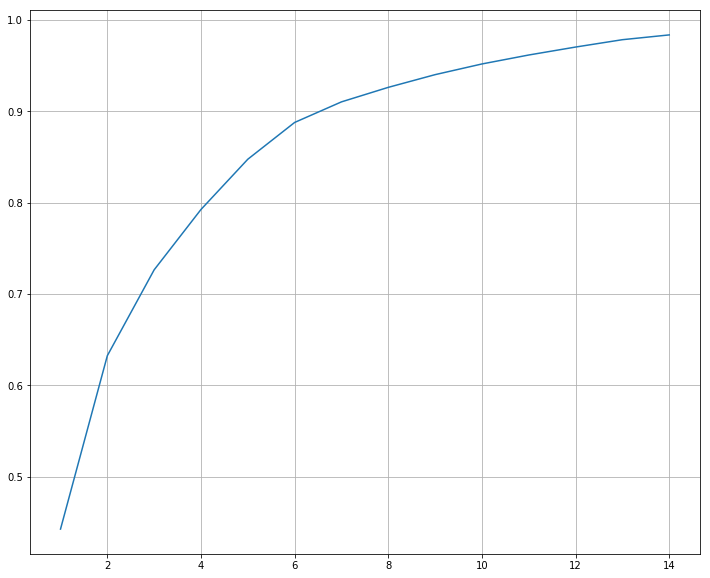

In [12]:
plt.figure(figsize=(12, 10));
plt.plot(np.arange(1, pca.explained_variance_ratio_.shape[0] + 1), pca.explained_variance_ratio_.cumsum());
plt.grid(True);

In [13]:
svd = TruncatedSVD(n_components=10)

In [14]:
x_svd = svd.fit_transform(scaler.fit_transform(x))

In [15]:
x_svd.shape

(569, 10)

In [16]:
cross_val_score(LogisticRegression(solver='lbfgs'), x_svd, y, cv=5, scoring='roc_auc').mean()

0.995158288230676

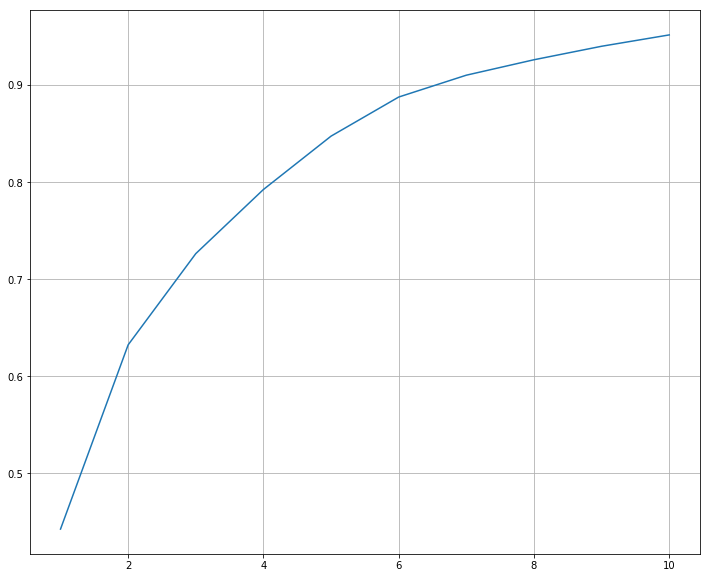

In [17]:
plt.figure(figsize=(12, 10));
plt.plot(np.arange(1, svd.explained_variance_ratio_.shape[0] + 1), svd.explained_variance_ratio_.cumsum());
plt.grid(True);